<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.775685  47.011535  38.138000  ...  180.208990  180.215770 -0.006780
      1.0    20.061430  72.096093  92.628887  ...  194.256707  194.197945  0.058762
      2.0    50.129380  63.356287  88.867743  ...  214.310601  212.145310  2.165291
      3.0    59.880835  80.277999  51.950266  ...  201.519577  202.137645 -0.618068
      4.0    51.964837  35.731339  67.011186  ...  164.415687  164.484916 -0.069229
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  71.465237  88.643698  95.775955  ...  265.014301  265.598101 -0.583800
      116.0  73.921681  86.955143  49.513079  ...  221.929662  220.412423  1.517239
      117.0  46.511390  79.631143  46.399735  ...  183.446019  182.637877  0.808142
      118.0  85.942303  53.558417  56.319776  ...  197.820300  205.844731 -8.024431
      119.0  58.022286  57.248923  34.341032  ...  160.781771  159.815372  0.966398

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.775685  47.011535  38.138000  ...  180.208990  180.215770 -0.006780
      1.0    20.061430  72.096093  92.628887  ...  194.256707  194.197945  0.058762
      2.0    50.129380  63.356287  88.867743  ...  214.310601  212.145310  2.165291
      3.0    59.880835  80.277999  51.950266  ...  201.519577  202.137645 -0.618068
      4.0    51.964837  35.731339  67.011186  ...  164.415687  164.484916 -0.069229
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  71.465237  88.643698  95.775955  ...  265.014301  265.598101 -0.583800
      116.0  73.921681  86.955143  49.513079  ...  221.929662  220.412423  1.517239
      117.0  46.511390  79.631143  46.399735  ...  183.446019  182.637877  0.808142
      118.0  85.942303  53.558417  56.319776  ...  197.820300  205.844731 -8.024431
      119.0  58.022286  57.248923  34.341032  ...  160.781771  159.815372  0.966398

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.775685,47.011535,38.138000,0.283770,180.208990,180.215770,-0.006780
1,0.0,1.0,20.061430,72.096093,92.628887,-0.529704,194.256707,194.197945,0.058762
2,0.0,2.0,50.129380,63.356287,88.867743,1.957192,214.310601,212.145310,2.165291
3,0.0,3.0,59.880835,80.277999,51.950266,-0.589524,201.519577,202.137645,-0.618068
4,0.0,4.0,51.964837,35.731339,67.011186,-0.291676,164.415687,164.484916,-0.069229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,71.465237,88.643698,95.775955,-0.870589,265.014301,265.598101,-0.583800
119996,999.0,116.0,73.921681,86.955143,49.513079,1.539758,221.929662,220.412423,1.517239
119997,999.0,117.0,46.511390,79.631143,46.399735,0.903750,183.446019,182.637877,0.808142
119998,999.0,118.0,85.942303,53.558417,56.319776,-8.000197,197.820300,205.844731,-8.024431


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.775685  47.011535  38.138000  ...  180.208990  180.215770 -0.006780
      1.0    20.061430  72.096093  92.628887  ...  194.256707  194.197945  0.058762
      2.0    50.129380  63.356287  88.867743  ...  214.310601  212.145310  2.165291
      3.0    59.880835  80.277999  51.950266  ...  201.519577  202.137645 -0.618068
      4.0    51.964837  35.731339  67.011186  ...  164.415687  164.484916 -0.069229
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  71.465237  88.643698  95.775955  ...  265.014301  265.598101 -0.583800
      116.0  73.921681  86.955143  49.513079  ...  221.929662  220.412423  1.517239
      117.0  46.511390  79.631143  46.399735  ...  183.446019  182.637877  0.808142
      118.0  85.942303  53.558417  56.319776  ...  197.820300  205.844731 -8.024431
      119.0  58.022286  57.248923  34.341032  ...  160.781771  159.815372  0.966398

[120000 rows x 7 columns]

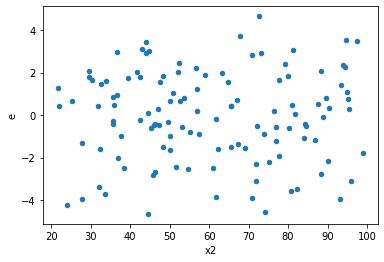

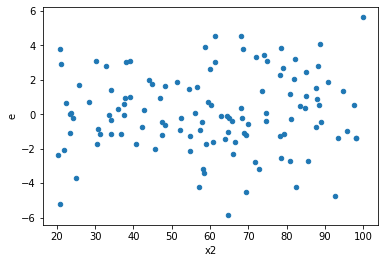

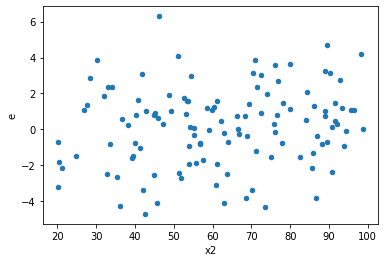

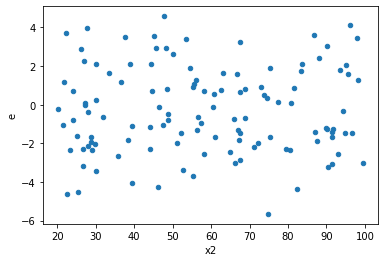

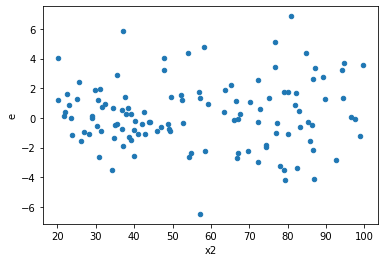

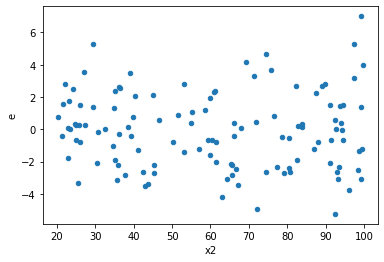

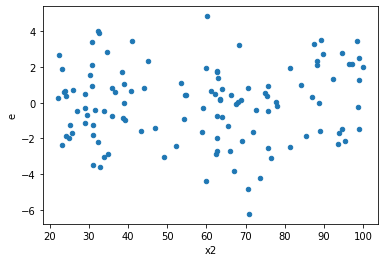

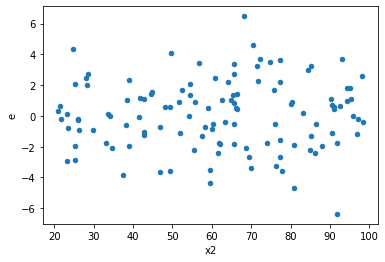

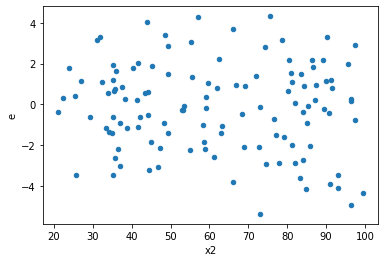

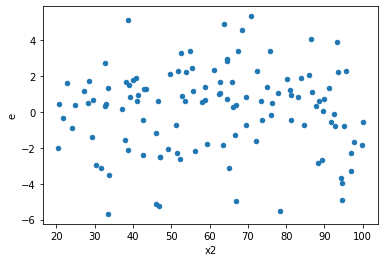

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,194.27406633365283,249.94593996929024,4.317201474081174,5.554354221539783,1.2865635886779898,0.40126413198343736,0.7993679340082813,0.20063206599171868,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,159.51205310155342,241.20656883701176,3.5447122911456317,5.360145974155817,1.5121526188585102,0.1692828081707629,0.9153585959146185,0.08464140408538146,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,112.97598712525591,290.1678861208161,2.5105774916723536,6.448175247129247,2.5684031934955205,0.001994285657574313,0.9990028571712128,0.0009971428287871564,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,187.76401254891024,345.10021209077547,4.172533612198006,7.668893602017233,1.8379465127849304,0.04391539589105942,0.9780423020544703,0.02195769794552971,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,183.26926088646087,205.5694954091885,4.072650241921353,4.568211009093078,1.1216801683755526,0.7017896629244205,0.6491051685377898,0.35089483146221023,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,167.62409134134907,249.39722430699612,3.7249798075855347,5.54216054015547,1.4878363981650142,0.18650699386180247,0.9067465030690988,0.09325349693090124,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,150.87055925112324,261.16625957487673,3.3526790944694054,5.8036946572194825,1.7310617848255396,0.06889783056226295,0.9655510847188685,0.034448915281131476,Reject001=1 : Homoscedasticity
10.0,45.0,45.0,173.08633920577356,240.79367989526017,3.8463630934616346,5.350970664339115,1.391176686734317,0.2718768671983609,0.8640615664008195,0.13593843359918045,Reject001=1 : Homoscedasticity
11.0,45.0,45.0,145.37356599812114,302.7804256391561,3.2305236888471365,6.728453903092357,2.0827749774196866,0.015487241287543085,0.9922563793562285,0.007743620643771543,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,194.27406633365283,249.94593996929024,4.317201474081174,5.554354221539783,1.2865635886779898,0.40126413198343736,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,159.51205310155342,241.20656883701176,3.5447122911456317,5.360145974155817,1.5121526188585102,0.1692828081707629,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,257.89973489069877,199.71222098919486,5.731105219793306,4.438049355315441,0.774379318667526,0.39436950584815245,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,263.48133745383245,214.17468915268842,5.855140832307388,4.759437536726409,0.8128647410946758,0.48989528583854847,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,112.97598712525591,290.1678861208161,2.5105774916723536,6.448175247129247,2.5684031934955205,0.001994285657574313,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,187.76401254891024,345.10021209077547,4.172533612198006,7.668893602017233,1.8379465127849304,0.04391539589105942,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,183.26926088646087,205.5694954091885,4.072650241921353,4.568211009093078,1.1216801683755526,0.7017896629244205,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,167.62409134134907,249.39722430699612,3.7249798075855347,5.54216054015547,1.4878363981650142,0.18650699386180247,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,150.87055925112324,261.16625957487673,3.3526790944694054,5.8036946572194825,1.7310617848255396,0.06889783056226295,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      925
Reject001=0 : Heteroscedasticity     75
Name: Result_test, dtype: int64